Import Libraries and Define Auxiliary Functions

We will import the following libraries the lab

In [4]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

Exploratory Data Analysis
First, let's read the SpaceX dataset into a Pandas dataframe and print its summary

In [5]:
import requests
import io
import pandas as pd

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
response = requests.get(URL)

# Convert the response content into a BytesIO stream
dataset_part_2_csv = io.BytesIO(response.content)

# Read into a DataFrame
df=pd.read_csv(dataset_part_2_csv)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the FlightNumber (indicating the continuous launch attempts.) and Payload variables would affect the launch outcome.

We can plot out the FlightNumber vs. PayloadMassand overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass also appears to be a factor; even with more massive payloads, the first stage often returns successfully.

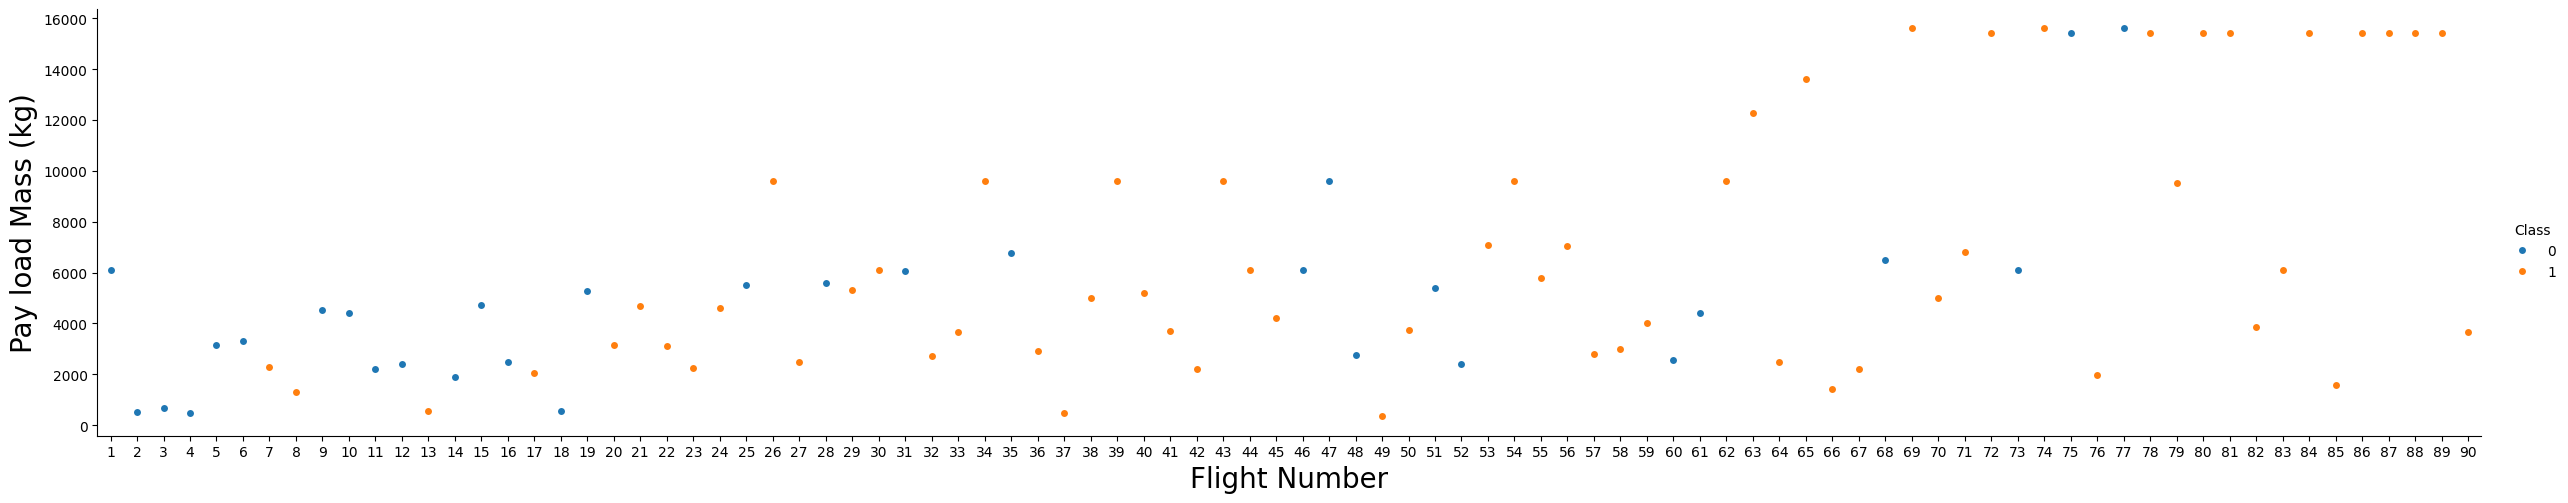

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

Next, let's drill down to each site visualize its detailed launch records.

TASK 1: Visualize the relationship between Flight Number and Launch Site
Use the function catplot to plot FlightNumber vs LaunchSite, set the parameter x parameter to FlightNumber,set the y to Launch Site and set the parameter hue to 'class'
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value

Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.

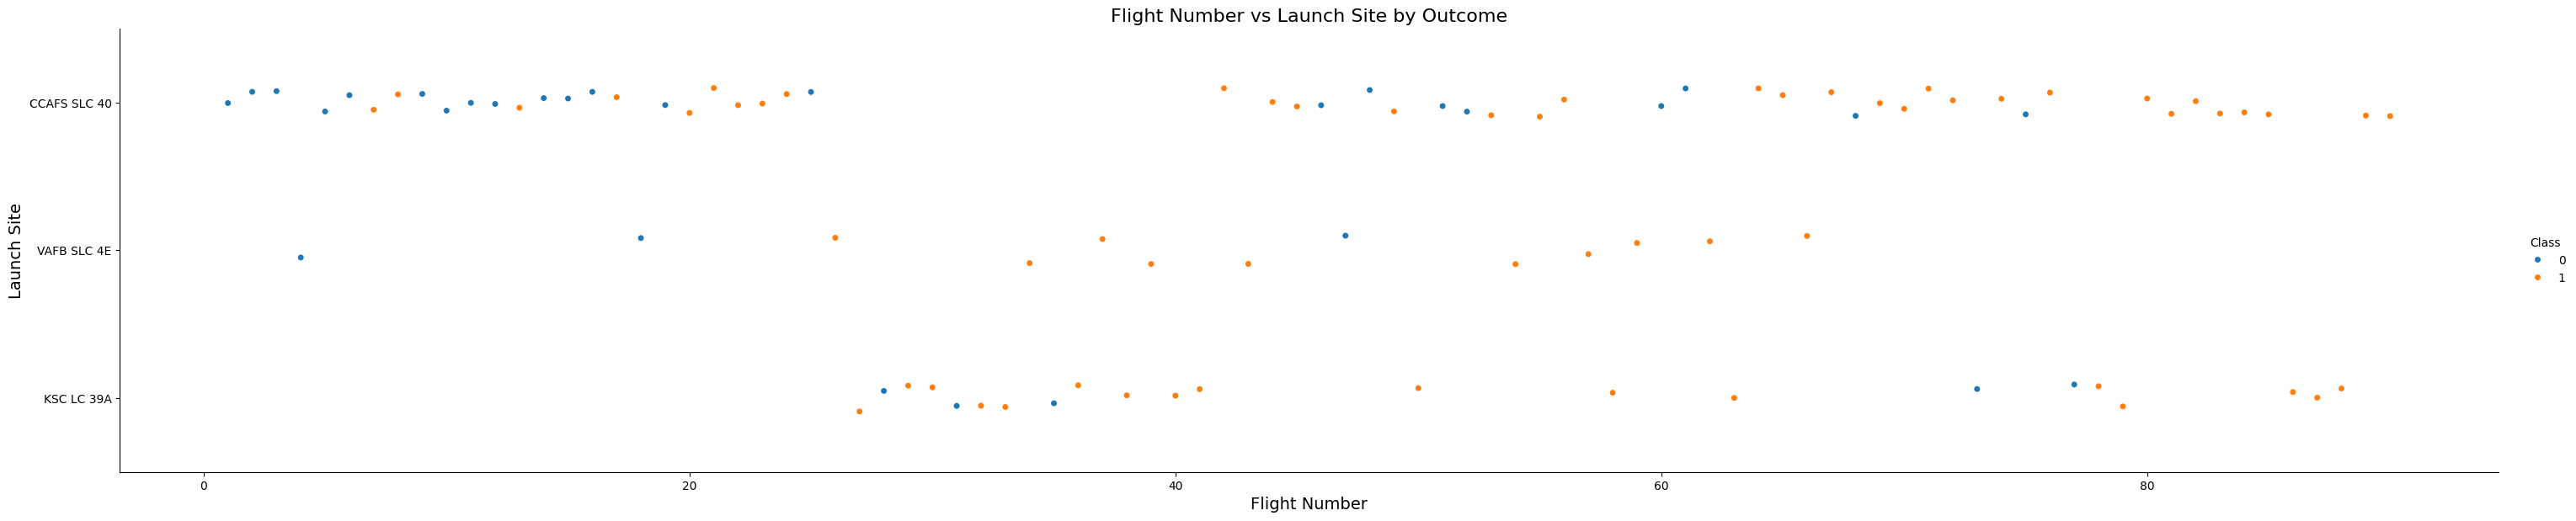

In [4]:
# Visualize the relationship between Flight Number and Launch Site
sns.catplot(x="FlightNumber", y="LaunchSite", hue="Class", data=df, aspect=5, height=6)
plt.xlabel("Flight Number", fontsize=14)
plt.ylabel("Launch Site", fontsize=14)
plt.title("Flight Number vs Launch Site by Outcome", fontsize=16)
plt.show()


This plot helps you spot patterns like:
Which launch sites had more successful launches
Whether success rates improved over time at each site
Any site-specific anomalies or trends

TASK 2: Visualize the relationship between Payload Mass and Launch Site
We also want to observe if there is any relationship between launch sites and their payload mass.

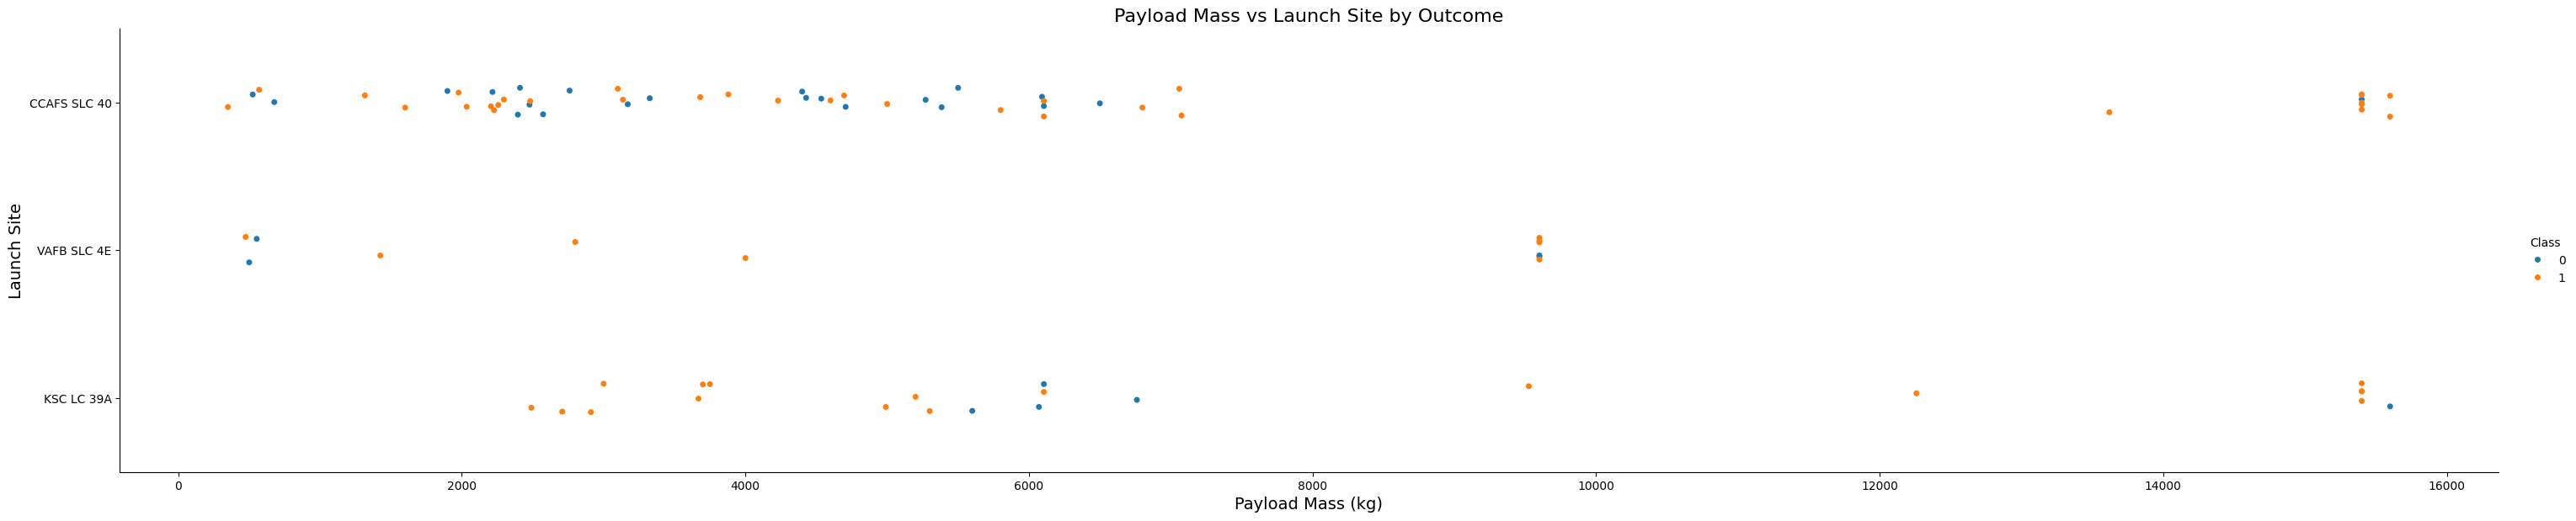

In [5]:
# Visualize the relationship between Payload Mass and Launch Site
sns.catplot(x="PayloadMass", y="LaunchSite", hue="Class", data=df, aspect=5, height=6)
plt.xlabel("Payload Mass (kg)", fontsize=14)
plt.ylabel("Launch Site", fontsize=14)
plt.title("Payload Mass vs Launch Site by Outcome", fontsize=16)
plt.show()


Now if you observe Payload Mass Vs. Launch Site scatter point chart you will find for the VAFB-SLC launchsite there are no rockets launched for heavypayload mass(greater than 10000).

What to Look For in the Plot
Payload Distribution by Site: You’ll see how different launch sites handle varying payload sizes. Some may specialize in heavier payloads.

Success vs. Failure: The color-coded Class values (typically green for success, red for failure) show whether heavier payloads correlate with launch outcomes at each site.

Site Specialization: If one site consistently launches heavier payloads with high success, it may indicate better infrastructure or mission targeting.

TASK 3: Visualize the relationship between success rate of each orbit type
Next, we want to visually check if there are any relationship between success rate and orbit type.
Let's create a bar chart for the sucess rate of each orbit
# HINT use groupby method on Orbit column and get the mean of Class column

Analyze the plotted bar chart to identify which orbits have the highest success rates.


C:\Users\user\AppData\Local\Temp\ipykernel_12648\1515362481.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Orbit', y='Class', data=orbit_success, palette='viridis')


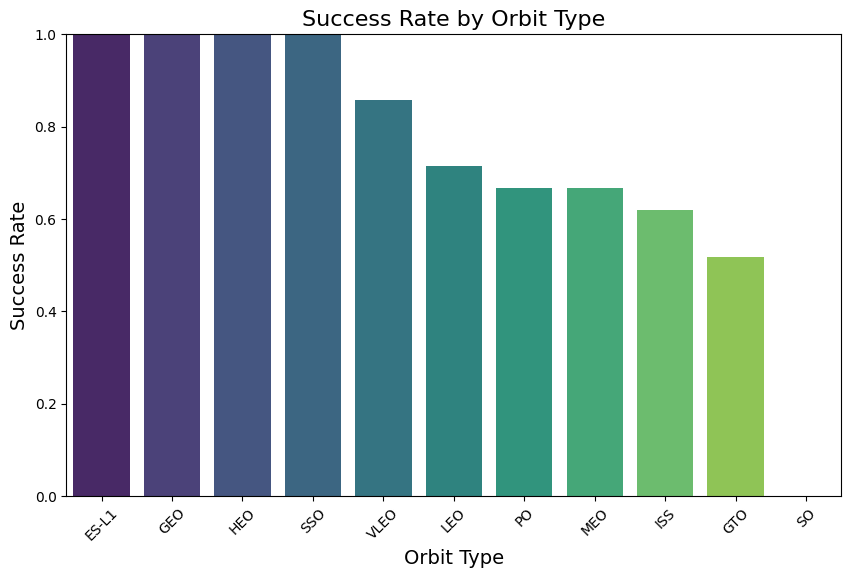

In [6]:
# Group by Orbit and calculate the mean success rate
orbit_success = df.groupby('Orbit')['Class'].mean().reset_index()

# Sort for better readability (optional)
orbit_success = orbit_success.sort_values(by='Class', ascending=False)

# Plot the success rate by orbit type
plt.figure(figsize=(10,6))
sns.barplot(x='Orbit', y='Class', data=orbit_success, palette='viridis')
plt.xlabel("Orbit Type", fontsize=14)
plt.ylabel("Success Rate", fontsize=14)
plt.title("Success Rate by Orbit Type", fontsize=16)
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()


TASK 4: Visualize the relationship between FlightNumber and Orbit type
For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value

You can observe that in the LEO orbit, success seems to be related to the number of flights. Conversely, in the GTO orbit, there appears to be no relationship between flight number and success.


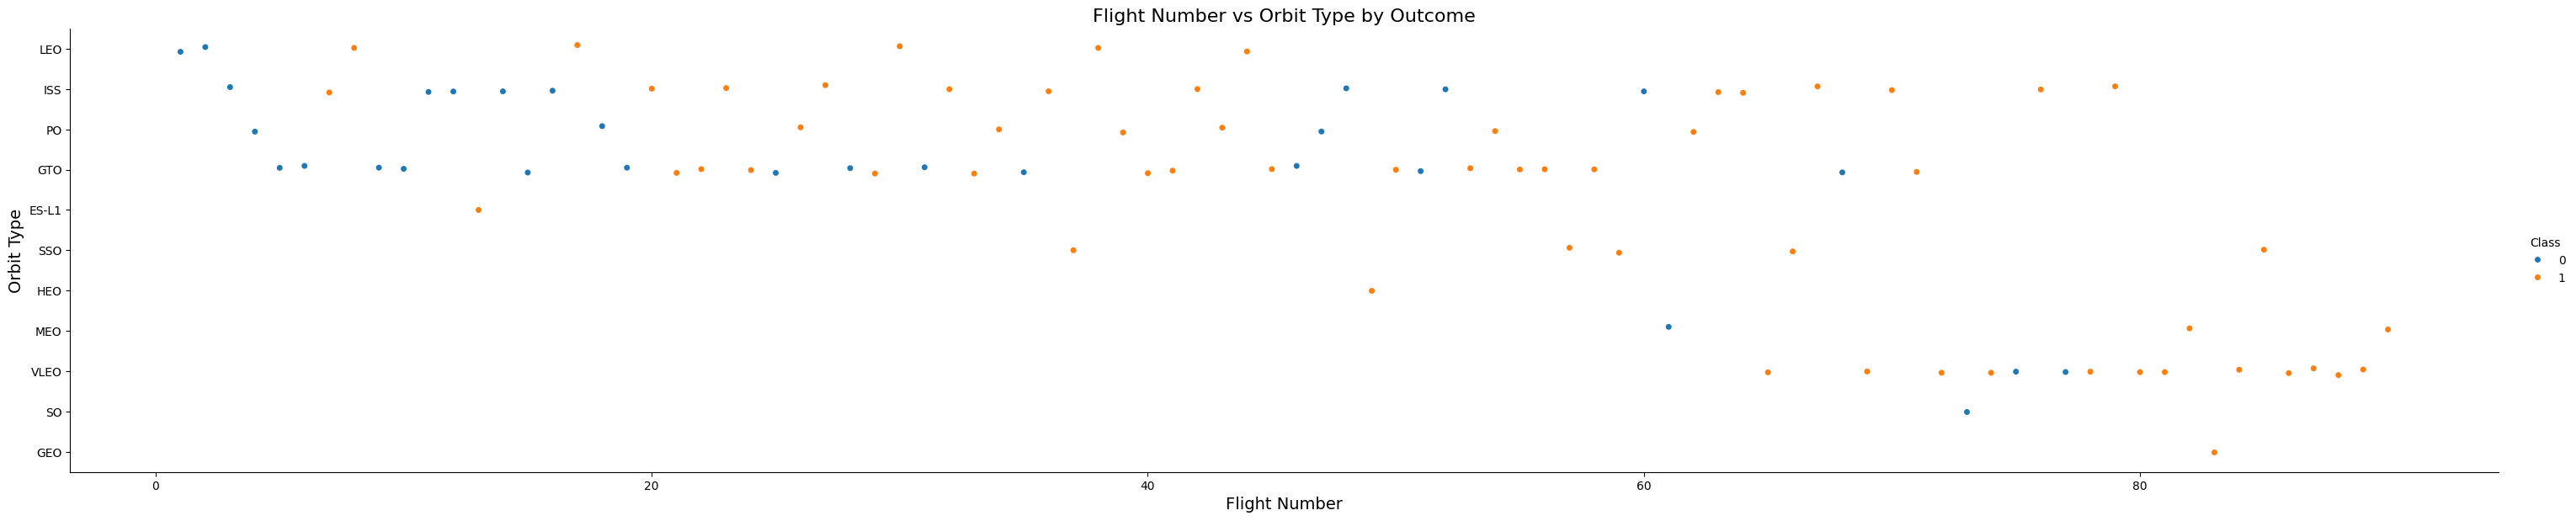

In [7]:
# Visualize the relationship between Flight Number and Orbit type
sns.catplot(x="FlightNumber", y="Orbit", hue="Class", data=df, aspect=5, height=6)
plt.xlabel("Flight Number", fontsize=14)
plt.ylabel("Orbit Type", fontsize=14)
plt.title("Flight Number vs Orbit Type by Outcome", fontsize=16)
plt.show()


TASK 5: Visualize the relationship between Payload Mass and Orbit type
Similarly, we can plot the Payload Mass vs. Orbit scatter point charts to reveal the relationship between Payload Mass and Orbit type
# Plot a scatter point chart with x axis to be Payload Mass and y axis to be the Orbit, and hue to be the class value
With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.
However, for GTO, it's difficult to distinguish between successful and unsuccessful landings as both outcomes are present.


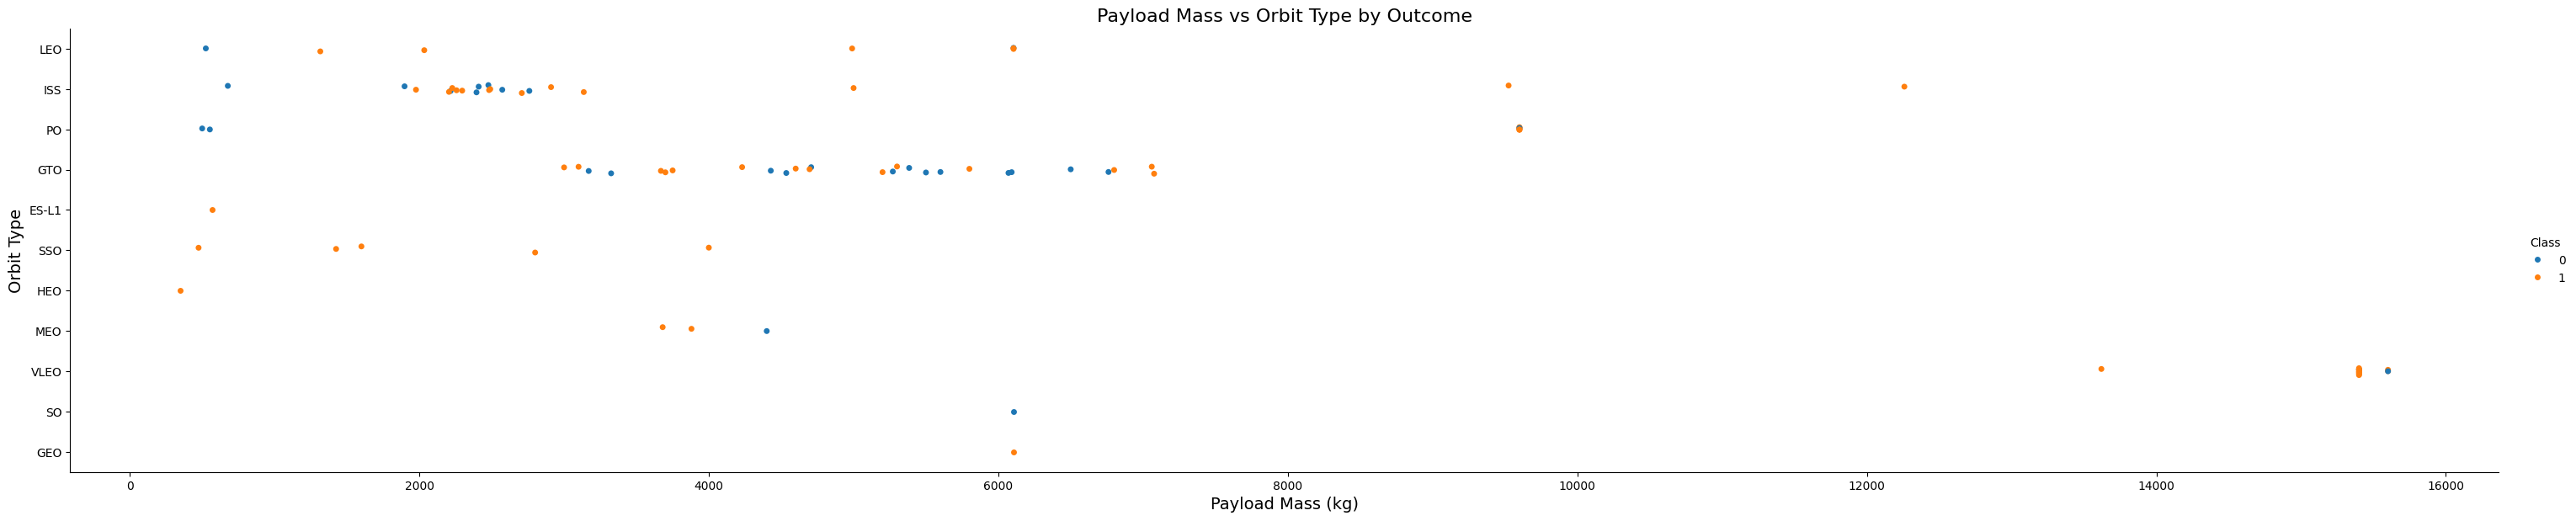

In [8]:
# Visualize the relationship between Payload Mass and Orbit type
sns.catplot(x="PayloadMass", y="Orbit", hue="Class", data=df, aspect=5, height=6)
plt.xlabel("Payload Mass (kg)", fontsize=14)
plt.ylabel("Orbit Type", fontsize=14)
plt.title("Payload Mass vs Orbit Type by Outcome", fontsize=16)
plt.show()


TASK 6: Visualize the launch success yearly trend
You can plot a line chart with x axis to be Year and y axis to be average success rate, to get the average launch success trend.
The function will help you get the year from the date:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()

# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
you can observe that the sucess rate since 2013 kept increasing till 2020


In [9]:
# Step 1: Extract year from the Date column
year = []
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year

Extract_year()
df['Year'] = year  # Rename to 'Year' for clarity
df['Year'] 

0     2010
1     2012
2     2013
3     2013
4     2013
      ... 
85    2020
86    2020
87    2020
88    2020
89    2020
Name: Year, Length: 90, dtype: object

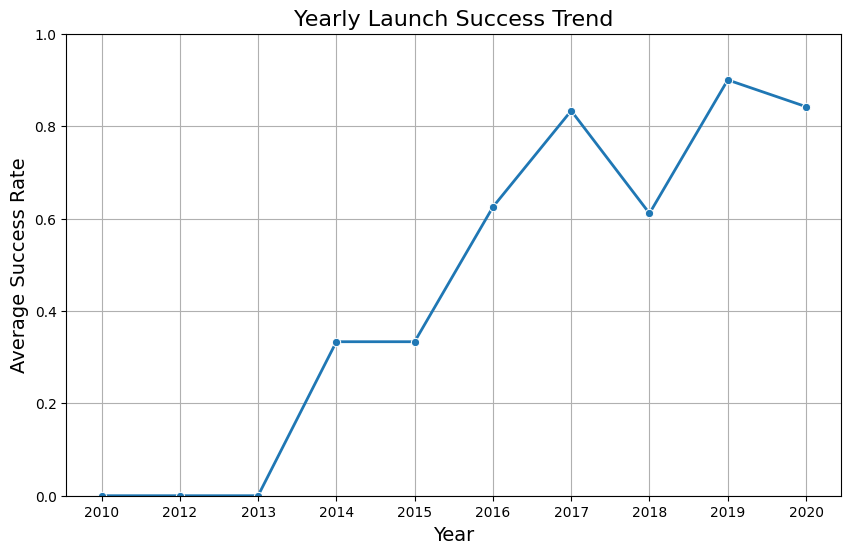

In [10]:
# Step 1: Extract year from the Date column
year = []
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year

Extract_year()
df['Year'] = year  # Rename to 'Year' for clarity

# Step 2: Group by Year and calculate average success rate
yearly_success = df.groupby('Year')['Class'].mean().reset_index()

# Step 3: Plot the success rate trend
plt.figure(figsize=(10,6))
sns.lineplot(x='Year', y='Class', data=yearly_success, marker='o', linewidth=2)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Average Success Rate", fontsize=14)
plt.title("Yearly Launch Success Trend", fontsize=16)
plt.ylim(0, 1)
plt.grid(True)
plt.show()


Features Engineering
By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.

In [10]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004
...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,15400.000000,VLEO,KSC LC 39A,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1060
86,87,15400.000000,VLEO,KSC LC 39A,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1058
87,88,15400.000000,VLEO,KSC LC 39A,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,5,B1051
88,89,15400.000000,VLEO,CCAFS SLC 40,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,2,B1060


In [6]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


TASK 7: Create dummy variables to categorical columns
Use the function get_dummies and features dataframe to apply OneHotEncoder to the column Orbits, LaunchSite, LandingPad, and Serial. Assign the value to the variable features_one_hot, display the results using the method head. Your result dataframe must include all features including the encoded ones.
# HINT: Use get_dummies() function on the categorical columns


In [7]:
import pandas as pd
# Create dummy variables for the specified categorical columns
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])

# Display the first few rows of the resulting dataframe
features_one_hot.head()


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


TASK 8: Cast all numeric columns to float64
Now that our features_one_hot dataframe only contains numbers, cast the entire dataframe to variable type float64
# HINT: use astype function


In [8]:
# Cast all columns in features_one_hot to float64
features_one_hot = features_one_hot.astype('float64')

# Confirm the change
features_one_hot.dtypes.head()


FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
dtype: object

In [9]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)

Question 2
What are the total number of columns in the features dataframe after applying one hot encoding to columns Orbits, LaunchSite, LandingPad and Serial .

Here the features  dataframe consists of the following columns FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial'

In [ ]:
# Count unique values in each categorical column
orbit_unique = df['Orbit'].nunique() #11
launchsite_unique = df['LaunchSite'].nunique() #3
landingpad_unique = df['LandingPad'].nunique() #5
serial_unique = df['Serial'].nunique() #53

orbit_unique 
#launchsite_unique

#landingpad_unique
#serial_unique

11

In [11]:
# Count unique values in each categorical column
orbit_unique = df['Orbit'].nunique()
launchsite_unique = df['LaunchSite'].nunique()
landingpad_unique = df['LandingPad'].nunique()
serial_unique = df['Serial'].nunique()

# Total columns = numeric/boolean + one-hot encoded columns
total_columns = 8 + orbit_unique + launchsite_unique + landingpad_unique + serial_unique
print("Total columns after one-hot encoding:", total_columns)


Total columns after one-hot encoding: 80
